In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 
import re

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
#Read train and test data
test_df = pd.read_csv(r"C:\PythonPrograms\HelloWorld\Kaggle\titanic\test.csv")
train_df = pd.read_csv(r"C:\PythonPrograms\HelloWorld\Kaggle\titanic\train.csv")
test1_df = pd.read_csv(r"C:\PythonPrograms\HelloWorld\Kaggle\titanic\test.csv")
train1_df = pd.read_csv(r"C:\PythonPrograms\HelloWorld\Kaggle\titanic\train.csv")

In [3]:
#Check missing values in each feature
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


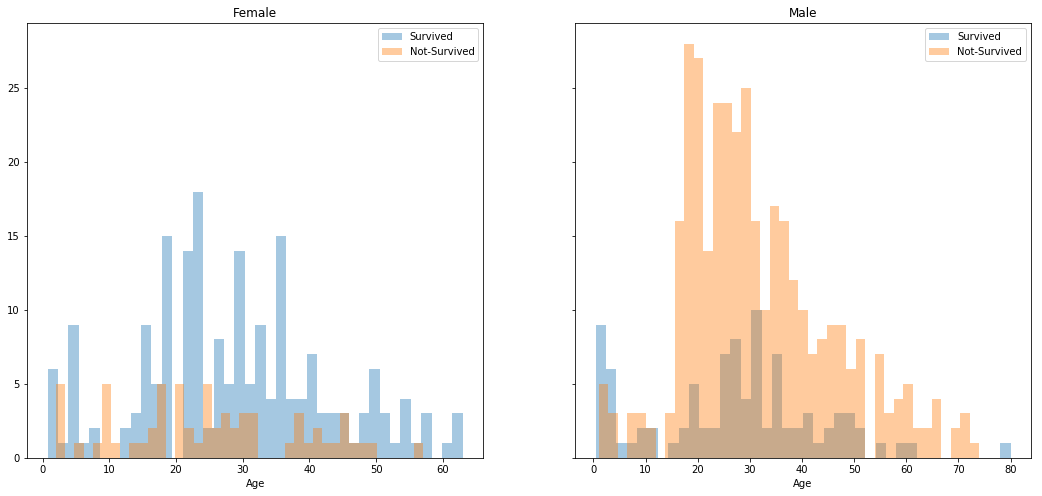

In [4]:
#Check survivor vs non-survivors by age and sex to get an idea
fig, axes = plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(18,8))
ax1 = sns.distplot(train_df.iloc[np.where((train_df['Sex']=='female')&(train_df['Survived']==1))].Age.dropna(),bins=40,label='Survived',ax=axes[0],kde=False)
ax1 = sns.distplot(train_df.iloc[np.where((train_df['Sex']=='female')&(train_df['Survived']==0))].Age.dropna(),bins=40,label='Not-Survived',ax=axes[0],kde=False)
ax1.legend()
ax1.set_title('Female')
ax2 = sns.distplot(train_df.iloc[np.where((train_df['Sex']=='male')&(train_df['Survived']==1))].Age.dropna(),bins=40,label='Survived',ax=axes[1],kde=False)
ax2 = sns.distplot(train_df.iloc[np.where((train_df['Sex']=='male')&(train_df['Survived']==0))].Age.dropna(),bins=40,label='Not-Survived',ax=axes[1],kde=False)
ax2.legend()
ax2.set_title('Male')

In [5]:
#Describe gives an idea of basic statistics of all features
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Get a slice of dataframe that can be used later if needed
women = train_df.iloc[np.where(train_df['Sex']=='female')]
men = train_df.iloc[np.where(train_df['Sex']=='male')]
survived = train_df.iloc[np.where(train_df['Survived']==1)]
not_survived = train_df.iloc[np.where(train_df['Survived']==0)]

In [7]:
#info gives feature data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

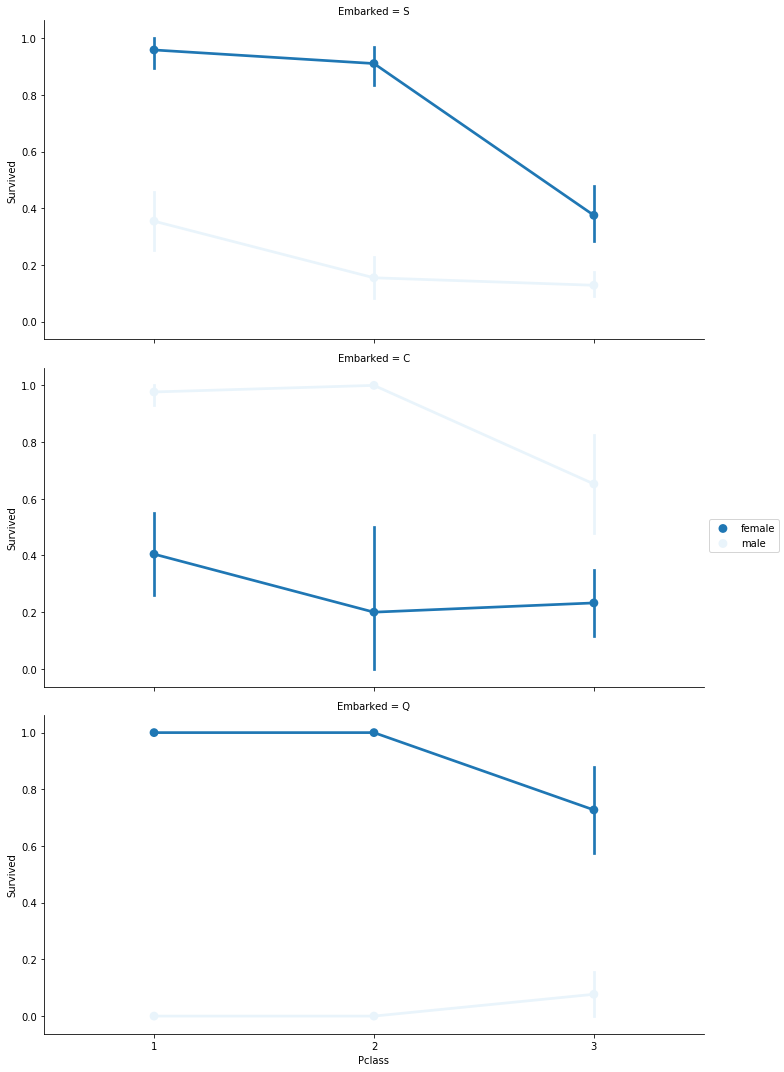

In [9]:
#Check Survivor by Embarked
pal = dict(male="green", female="blue")
g = sns.FacetGrid(train_df,row='Embarked',size=5,aspect=2) #hue='Sex',palette=pal,
g.map(sns.pointplot,'Pclass','Survived','Sex').add_legend()

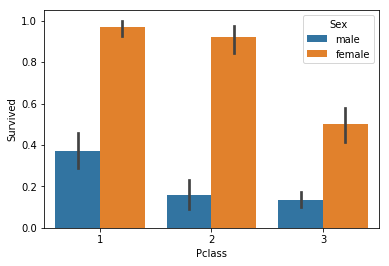

In [10]:
#See Survivors by Class and Sex
sns.barplot(data=train_df,x='Pclass',y='Survived',hue='Sex')

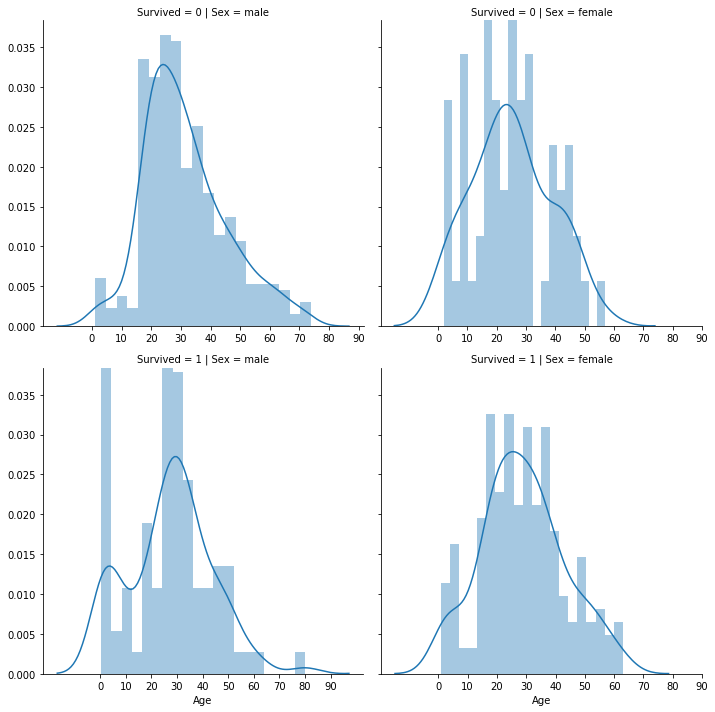

In [11]:
#This is the same we saw already but in a different view - survivor distribution by age and sex
g = sns.FacetGrid(train_df,row='Survived',col='Sex',sharex=False,size=5)
g.map(sns.distplot,'Age',bins=20)
#start, end = g.get_xlim()
g.set(xticks=np.arange(0, 100, 10)) 

In [12]:
#Create new feature 'Relatives' that is sum of siblings and parents
dataset=[train_df,test_df]
for df in dataset:
    df['relatives'] = df['SibSp']+df['Parch']

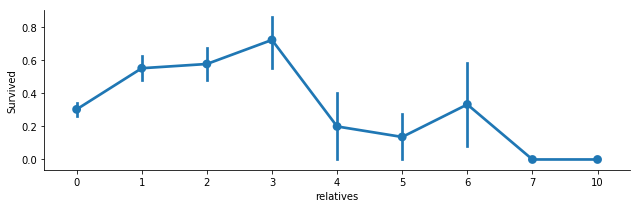

In [13]:
#See survivors by relatives. it shows if you had 3 relatives travelling, you had higher probablity to survive
sns.factorplot('relatives','Survived',data=train_df,size=3,aspect=3)

Below test is to understand how regular expression search works. ^ is to search for start string. Better to use try except, as it gives attribute error if it cant find a match.

In [14]:
# Below is just a test and learning how regular expression works
x = 'AaT123'
#t = lambda x: re.compile('^a').search(x).group() if re.compile('^a').search(x) else 'none'
try:
    a = re.search('^A',x).group()
except AttributeError:
    a = 'None'
#print(t)
#print(t.group())
print(a)

A


In [15]:
#create deck feature from Cabin with numeric values for linear model to work
deck = {'U':0, 'C':3, 'E':5, 'G':7, 'D':4, 'A':1, 'B':2, 'F':6, 'T':8}
for df in dataset:
    df['Cabin'][df['Cabin'].isnull()]='U0'
    df['Deck'] = df['Cabin'].map(lambda x: re.compile('([A-Za-z])+').search(x).group())
    df['Deck'] = df['Deck'].map(deck).astype(int)

train_df.head()
#test_df.head()

c:\users\a6fkqzz\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,0,0


Drop the Cabin as they are not needed anymore.

In [16]:
#Drop Cabin as we may not need it. will use Deck going forward
train_df = train_df.drop(['Cabin'],axis=1)
test_df = test_df.drop(['Cabin'],axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0


Below is test to extract titles from Name using regular expression. Not actually used for our model, but good to know.

In [17]:
#another test to see if titles are extracted by regular expression
s = pd.Series(['Braund, Mr. Owen Harris', 'Cumings, Mrs. John Bradley', 'Heikkinen, Mis. Laina'])
s.str.extract('([A-Za-z]+)\.', expand=False)

0     Mr
1    Mrs
2    Mis
dtype: object

Lets see how our datasets looks like. We look for any objects in the dataset, that needs to be coverted to float or int.

In [18]:
#Check the data type of features in test and train data
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
relatives      891 non-null int64
Deck           891 non-null int32
dtypes: float64(2), int32(1), int64(6), object(4)
memory usage: 87.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-nu

So we have Name, Sex, Ticket and Embarked as objects. Name and Ticket is not relevant and will drop them. We will drop passenger ID as is not relevant for model. We will also drop SibSP & Parch as they are represented in new relatives col added.

In [19]:
#NO need for passenger ID, name, sibling, parents (replaced by 'Relatives'), ticket. So dropped them.
dataset = [train_df,test_df]
for df in dataset:
    df.drop(['PassengerId','Name','SibSp','Parch','Ticket'],axis=1,inplace=True)
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null object
Age          714 non-null float64
Fare         891 non-null float64
Embarked     889 non-null object
relatives    891 non-null int64
Deck         891 non-null int32
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 52.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass       418 non-null int64
Sex          418 non-null object
Age          332 non-null float64
Fare         417 non-null float64
Embarked     418 non-null object
relatives    418 non-null int64
Deck         418 non-null int32
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 21.3+ KB


The columns Sex and Embarked as Objects, that need to be changed to int. Before we do that there are missing values in Age, Fare that should be taken care.

Age: missing values replaced by Mean
Fare: missing values replaced by zeroes

In [20]:
#Fill in missing Age with mean values.
dataset = [train_df,test_df]
for df in dataset:
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null object
Age          891 non-null float64
Fare         891 non-null float64
Embarked     889 non-null object
relatives    891 non-null int64
Deck         891 non-null int32
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 52.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass       418 non-null int64
Sex          418 non-null object
Age          418 non-null float64
Fare         417 non-null float64
Embarked     418 non-null object
relatives    418 non-null int64
Deck         418 non-null int32
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 21.3+ KB


In [21]:
#fill missing fare with zeroes
dataset = [train_df,test_df]
for df in dataset:
    df['Fare'].fillna(0,inplace=True)
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null object
Age          891 non-null float64
Fare         891 non-null float64
Embarked     889 non-null object
relatives    891 non-null int64
Deck         891 non-null int32
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 52.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass       418 non-null int64
Sex          418 non-null object
Age          418 non-null float64
Fare         418 non-null float64
Embarked     418 non-null object
relatives    418 non-null int64
Deck         418 non-null int32
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 21.3+ KB


Embarked in Train_df has 2 missing values. let us see unique values of Embarked

In [22]:
#check any missing values in Embarked
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

we see null value (nan). let us see the mode/top value that we will replace with its missing value. test_df has no missing embarked value, so will leave that for now.

In [23]:
#See mode of Embarked feature
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [24]:
#replace missing Embarked values with mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null object
Age          891 non-null float64
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
Deck         891 non-null int32
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 52.3+ KB


In [25]:
train_df.groupby(['Embarked']).count()

,Survived,Pclass,Sex,Age,Fare,relatives,Deck
Embarked,,,,,,,
C,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77
S,646,646,646,646,646,646,646


Now let us convert objects on the df into numeric values. Sex and Embarked are objects.

In [26]:
#Convert sex category into numeric value (for linear models)
sex_map = {'male':1, 'female':2}
for df in dataset:
    df['Sex']=df['Sex'].map(sex_map)
    print(df.Sex.unique())

[1 2]
[1 2]


In [27]:
#Get unique Embared feature
for df in dataset:
    print(df.Embarked.unique())

['S' 'C' 'Q']
['Q' 'S' 'C']


In [28]:
#Convert embarked feature to numeric for linear model
emb_map={'S':1, 'C':2, 'Q':3}
for df in dataset:
    df['Embarked']=df['Embarked'].map(emb_map)

In [29]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null float64
Fare         891 non-null float64
Embarked     891 non-null int64
relatives    891 non-null int64
Deck         891 non-null int32
dtypes: float64(2), int32(1), int64(5)
memory usage: 52.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass       418 non-null int64
Sex          418 non-null int64
Age          418 non-null float64
Fare         418 non-null float64
Embarked     418 non-null int64
relatives    418 non-null int64
Deck         418 non-null int32
dtypes: float64(2), int32(1), int64(4)
memory usage: 21.3 KB


Build X_train, Y_train and X_test

In [118]:
X_train = train_df.drop("Survived", axis=1).copy()
Y_train = train_df["Survived"].copy()
X_test  = test_df.copy()

Now lets scale the data to get them within a range, so models dont get swayed away by a large number in one feature.

In [119]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

Now Let us build the models. This is the fun part :). Lets start with stochastic gradient descent (SGD) learning

In [120]:
#Build Linear Model
sgb = linear_model.SGDClassifier(max_iter=5)
sgb.fit(X_train,Y_train)
Y_pred = sgb.predict(X_test)

In [121]:
#Score linear model
sgb.score(X_train,Y_train)

0.80134680134680136

In [122]:
#Get coefficient values to see which has more weightage on classification
coef = pd.DataFrame(data=sgb.coef_.transpose(),columns=['Coef_value'],index=test_df.columns.values)
#coef = pd.DataFrame(sgb.coef_,columns=test_df.columns.values,index=['SGD'])
print(coef)

           Coef_value
Pclass      -5.905503
Sex          9.028662
Age         -1.462222
Fare        -0.034864
Embarked     3.928961
relatives   -4.656580
Deck         0.895601


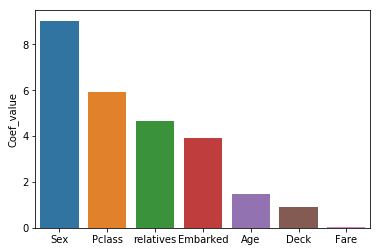

In [123]:
#Visualize coefficent values of linear model
#order=abs(coef.loc['SGD']).sort_values(ascending=False).index
#sns.barplot(x=coef.columns.values,y=abs(coef.loc['SGD']),order=order)
order=abs(coef.Coef_value).sort_values(ascending=False).index
sns.barplot(x=coef.index,y=abs(coef['Coef_value']),order=order)

In [124]:
#Build other models as a dictionary
models = {'log_reg':LogisticRegression(),
          'rand_cls':RandomForestClassifier(),
         'decision_treee':DecisionTreeClassifier(),
          'perceptron':Perceptron(max_iter=10),
         'knn':KNeighborsClassifier(),
          'linearSVC':LinearSVC(),
          'gaussian':GaussianNB(),
          'SGD_cls':SGDClassifier(max_iter=5)}

#create empty dict to get scores for all models
scores = dict()

def get_model_scores(model):
    model.fit(X_train,Y_train)
    return model.score(X_train,Y_train)

for key,model in models.items():
    scores[key] = get_model_scores(model)

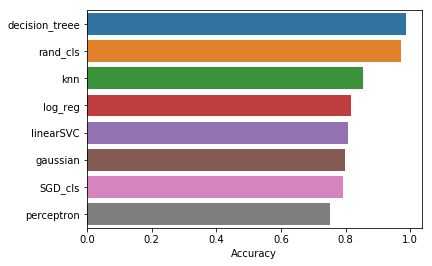

In [125]:
#Create a dataframe with scores
scores_df = pd.DataFrame(data=list(scores.values()),columns=['Accuracy'],index=list(scores.keys()))
#get order by Accuracy value
order=scores_df.Accuracy.sort_values(ascending=False).index
#plot to see Accuracy of models by highest to lowest
sns.barplot(data=scores_df,x='Accuracy',y=scores_df.index,order=order)